# Bayesianness

Importing the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize

In [2]:
%matplotlib notebook

Defines the model used for the fitting and the negative log likelihood function of that model.

In [3]:
def Model(x, m, c):
    return m*x + c

def MinusLogLikelihood(Params, xdata, ydata, σ):
    m, c = Params[0], Params[1]
    Regression = 0
    σSum = 0
    for k in range(len(xdata)):
        Regression += (ydata[k] - Model(xdata[k], m, c))**2
        σSum += σ[k]
    σAverage = σSum/len(xdata)
    return len(xdata)/2*np.log(2*np.pi*σAverage**2) + (2*σAverage**2)**-1*Regression

Least-Square fit doesn't work using σ = 1/(yError^2)

In [4]:
def MinusLogLikelihood2(Params, x, y, yError):
    m, c = Params[0], Params[1]
    model = m*x + c
    σ = 1/(yError**2)
    return - (-0.5*(np.sum((y-model)**2*yError - np.log(yError))))

An equation we derived that seems to work.

In [5]:
def MinusLogLikelihood3(Params, x, y, yError):
    m, c = Params[0], Params[1]
    model = m*x + c
    σ = 1/(yError**2)
    return - (-len(yError)/2*np.log(2*np.pi) + np.sum(np.log(σ) - (y-model)**2/(2*σ**2)))

....

Creates a random set of numbers normally distributed and inputting it into y.

In [6]:
SetSeed = True

if SetSeed:
    Seed = 923114
    np.random.seed(Seed)

x = np.random.randn(20)
m, c = 2, 3
Noise = np.random.randn(20)
y = Model(x, m, c) + Noise
yError = np.random.random(20)

This minimises each of the parameters and the standard deviation on the normally distributed noise, in the negative log likelihood function. This gives us the "Best fit parameters" for this data.

In [7]:
x0 = [0, 0]
Minimising = minimize(MinusLogLikelihood2, x0, args=(x, y, yError))

if Minimising.success:
    Params = Minimising.x
    ParamsError = np.sqrt((np.diag(Minimising.hess_inv)))
    print(f'The fitted parameters are m = {round(Params[0], 3)} ± {round(ParamsError[0], 3)}, '
          f'c = {round(Params[1], 3)} ± {round(ParamsError[1], 3)}, Cov = {np.abs(round(Minimising.hess_inv[0][1], 3))}')
else:
    print('There was an error when minimising this function')

The fitted parameters are m = 2.15 ± 0.303, c = 3.566 ± 0.302, Cov = 0.009


Values from different log likelihood functions.

In [8]:
MinusLogLikelihood(Params, x, y, yError)

45.97336419403706

In [9]:
MinusLogLikelihood2(Params, x, y, yError)

16.288510548324712

In [10]:
MinusLogLikelihood3(Params, x, y, yError)

-16.822914519265183

In [11]:
Minimising

      fun: 16.288510548324712
 hess_inv: array([[ 0.09155469, -0.00889063],
       [-0.00889063,  0.0915027 ]])
      jac: array([-2.38418579e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([2.149514  , 3.56624792])

An array of aribitrary numbers is created to plot the model with the calculated best fit parameters.

In [12]:
xOutput = np.linspace(min(x), max(x), 1000)
yOutput = Model(xOutput, Params[0], Params[1])

<IPython.core.display.Javascript object>


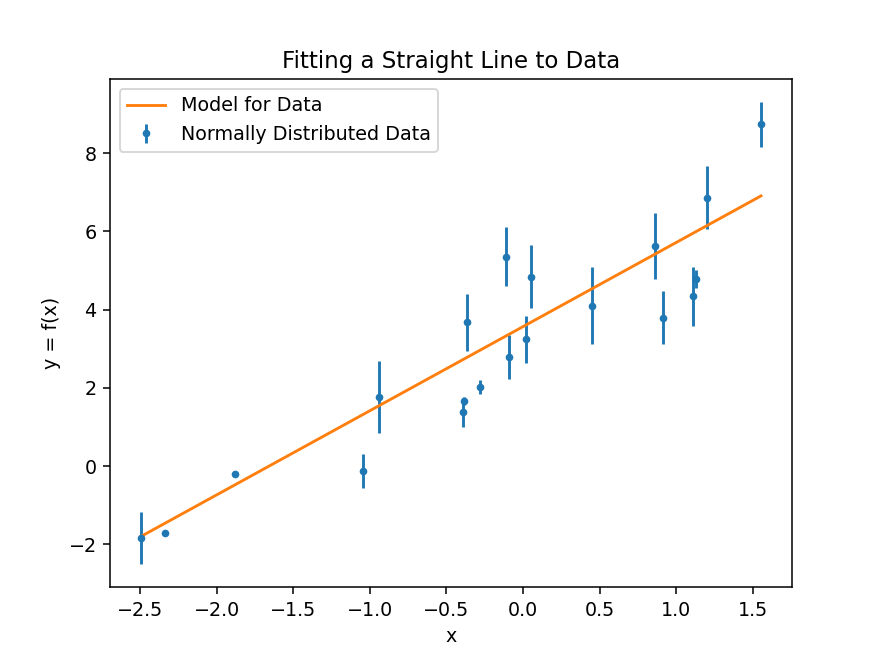

In [13]:
plt.figure()
plt.errorbar(x, y, yerr=yError, fmt='.', label='Normally Distributed Data')
plt.plot(xOutput, yOutput, label='Model for Data')
plt.title('Fitting a Straight Line to Data')
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()

## Parameter Space

In [14]:
u=Params[0]     #x-position of the center
v=Params[1]    #y-position of the center
a=ParamsError[0]     #radius on the x-axis
b=ParamsError[1]    #radius on the y-axis
t = np.linspace(0, 2*np.pi, 1000)

Ignore this next cell, it's for testing purposes only.

<IPython.core.display.Javascript object>


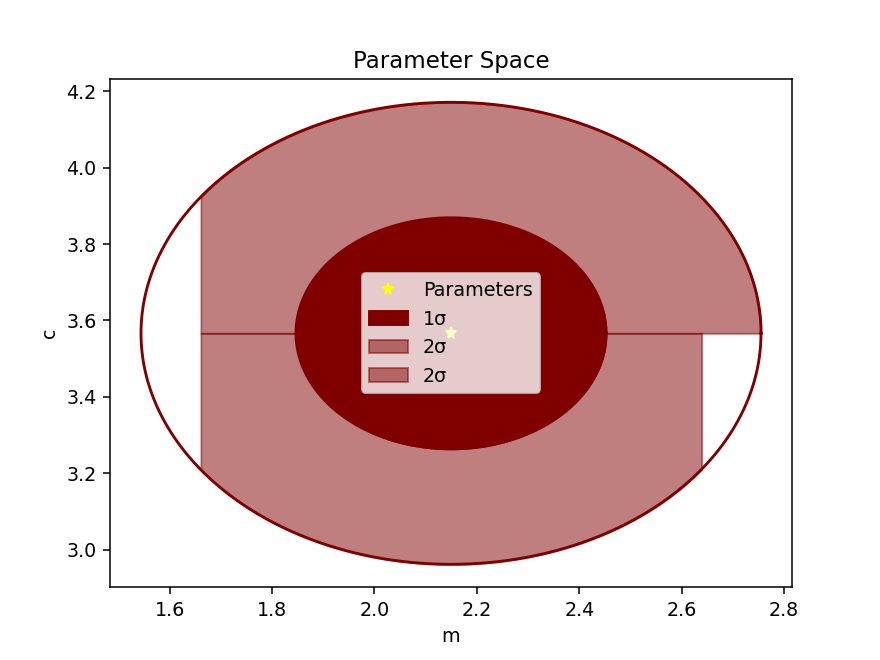

In [15]:
fig, ax = plt.subplots()
plt.plot(u, v, '*', color='yellow', label='Parameters')

χ = u+a*np.cos(t)
χ2 = u+a*2*np.cos(t)
χ3 = u+a*3*np.cos(t)
υ = v+b*np.sin(t)
υ2 = v+b*2*np.sin(t)
υ3 = v+b*3*np.sin(t)
plt.plot(χ, υ, color='maroon')
plt.plot(χ2, υ2, color='maroon')
#plt.plot(χ3, υ3, color='maroon')
ax.fill_between(χ, v, υ, alpha=1, color='maroon', label=f'1σ')
ax.fill_between(χ2[0:400], v, υ2[0:400], alpha=1/2, color='maroon', label=f'2σ')
ax.fill_between(χ2[600:900], v, υ2[600:900], alpha=1/2, color='maroon', label=f'2σ')
#ax.fill_between(χ3, υ, υ3, alpha=1/3, color='maroon', label=f'3σ')

plt.xlabel('m')
plt.ylabel('c')
plt.title('Parameter Space')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


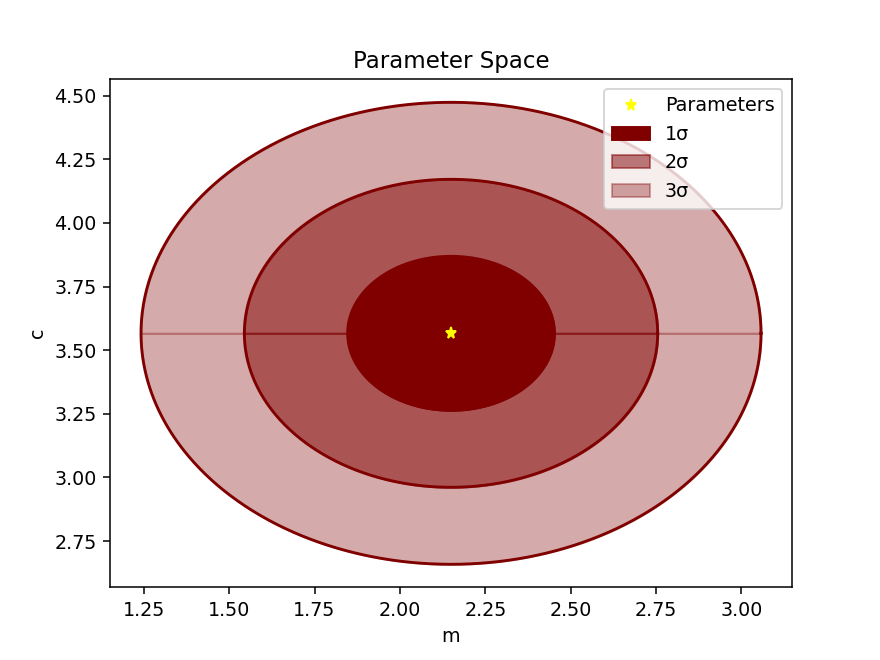

In [16]:
fig, ax = plt.subplots()
plt.plot(u, v, '*', color='yellow', label='Parameters')
for n in range(1, 4):
    χ = u+a*n*np.cos(t)
    υ = v+b*n*np.sin(t)
    plt.plot(χ, υ, color='maroon')
    ax.fill_between(χ, υ, v, alpha=1/n, color='maroon', label=f'{n}σ')

plt.xlabel('m')
plt.ylabel('c')
plt.title('Parameter Space')
plt.legend()

plt.show()